In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import sys
sys.path.append("../modules")

from HPIB_plot import *
from scipy.constants import e, k
from scipy.special import lambertw
from scipy.optimize import least_squares
from lmfit import Model

In [91]:
path=f'D:/Dropbox/Cryochip/Medidas/240621 - TN3 TN12 TP1 DN1 DN2 CB1/Cooldown/TN12'

D:\Dropbox\Cryochip\Medidas\240621 - TN3 TN12 TP1 DN1 DN2 CB1\Cooldown\TN12\285.4 K.csv
[3.99642015e-07 4.06402448e-01 3.60401067e-05 1.39126234e+00]


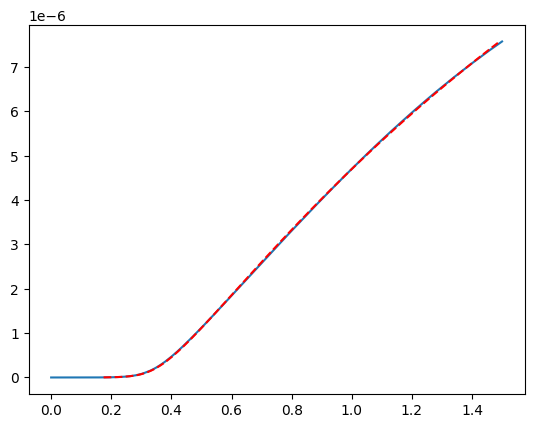

In [48]:
print(path)
try: df=pd.read_csv(path, header=[0, 1])
except: print("Error opening VGS\n")
    
if df.columns.levels[1][0] != 'None':
    df.columns.levels[1][0] != ''

VG=getpd(df, 'Vg')
VD=float(df.columns.levels[1][0])
ID=getpd(df, 'Id')
gm=getpd(df, 'gm')

Vgfit=VG[np.argmax(gm)-2:np.argmax(gm)+2]
Idfit=ID[np.argmax(gm)-2:np.argmax(gm)+2]

m, b= np.polyfit(Vgfit, Idfit, 1)
LIN=-b/m+VD/2

for n, V in enumerate(VG):
    if V > LIN:
        break

Vgfit=VG[int(n/2):]
Idfit=ID[int(n/2):]

p0=[1e-7, 0, 1, 1]
res=least_squares(fun, p0, args=(Idfit, Vgfit, T), xtol=None, loss='cauchy', max_nfev=3000)
print(res.x)

plt.plot(VG, ID, Vg(res.x, Idfit, T), Idfit, '--r')
plt.show()

In [92]:
path.rsplit('/', 1)[0]

'D:/Dropbox/Cryochip/Medidas/240621 - TN3 TN12 TP1 DN1 DN2 CB1/Cooldown'

In [99]:
for file in os.listdir(path):
    try:
        SecDer(f"{path}/{file}", float(file.strip(' K.csv')))
    except:
        continue

144.4 [5.02535266e-07 4.00000000e-01 2.09874021e-11 1.40000000e+00] 3000
147.9 [5.08424379e-07 4.00000000e-01 2.80671754e-11 1.40000000e+00] 3000
163.1 [5.15920254e-07 3.99999928e-01 2.03925030e-10 1.39999998e+00] 3000
175.4 [5.09293981e-07 4.00000000e-01 1.40460257e-09 1.40000000e+00] 189
179.9 [1.80057850e-05 4.00000000e-01 1.11743584e-18 1.40000000e+00] 82
184.3 [1.33255638e-08 4.00000000e-01 1.00000021e-05 1.40000000e+00] 3000
189.1 [5.58868235e-07 4.70661259e-01 1.43904133e-08 1.46219710e+00] 119
193.8 [5.57083382e-07 4.69581639e-01 2.80397549e-08 1.47081032e+00] 66
198.6 [5.50653714e-07 4.66394544e-01 4.97172155e-08 1.47168597e+00] 63
203.8 [5.28349233e-07 4.53268700e-01 6.87938224e-08 1.44475850e+00] 64
209.1 [1.32143272e-08 4.00000000e-01 1.00000004e-05 1.40000000e+00] 3000
214.8 [1.81852908e-05 4.00000000e-01 8.74402145e-16 1.40000000e+00] 78
220.4 [1.82055169e-05 4.00000000e-01 2.01692968e-15 1.40000000e+00] 68
232.1 [1.84265362e-05 4.00000000e-01 9.87888910e-15 1.40000000e+0